In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from pylab import rcParams

In [1]:
#URL FOR DATASET: https://www.kaggle.com/lava18/google-play-store-apps

file = "google_play_full.csv"


In [3]:
data = pd.read_csv(file, encoding='UTF-8')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.shape

(267034, 13)

# Data Cleansing Step

In [6]:
data_valid_installs = data.loc[data.Installs.apply(lambda x: "+" in x)]

In [8]:
data_valid_installs.Installs.value_counts()

10,000+           60531
1,000+            48880
100,000+          37498
5,000+            26360
50,000+           22795
100+              18502
500+              13919
1,000,000+        12853
500,000+           9846
10+                4427
50+                3871
10,000,000+        2821
5,000,000+         2804
5+                  671
1+                  445
50,000,000+         414
100,000,000+        283
0+                   52
500,000,000+         35
1,000,000,000+       24
5,000,000,000+        3
Name: Installs, dtype: int64

In [9]:
data_valid_installs.dtypes

App                 object
Category            object
Rating             float64
Reviews              int64
Installs            object
Installs as Int      int64
Size                object
Price               object
Content Rating      object
Last Updated        object
Minimum Version     object
Latest Version      object
Unnamed: 12         object
dtype: object

In [10]:
data_valid_installs.Rating = data_valid_installs.Rating.astype(float)

In [11]:
data_valid_installs.Reviews = data_valid_installs.Reviews.astype(float)

In [12]:
data_valid_installs.dtypes

App                 object
Category            object
Rating             float64
Reviews            float64
Installs            object
Installs as Int      int64
Size                object
Price               object
Content Rating      object
Last Updated        object
Minimum Version     object
Latest Version      object
Unnamed: 12         object
dtype: object

In [ ]:
#Drop Unnamed columns of NaNs
del data_valid_installs["Unnamed: 11"]
del data_valid_installs["Unnamed: 12"]

In [ ]:
data_valid_installs.dtypes

In [ ]:
data_valid_installs.Price.value_counts()

In [14]:
#Create new column of Installs that have +'s and ,'s removed and converted into floats.
data_valid_installs["Installs_Numeric"] = data_valid_installs.Installs.apply(lambda x: float(x.replace("+", "").replace(",", "")))

In [15]:
data_valid_installs.dtypes

App                  object
Category             object
Rating              float64
Reviews             float64
Installs             object
Installs as Int       int64
Size                 object
Price                object
Content Rating       object
Last Updated         object
Minimum Version      object
Latest Version       object
Unnamed: 12          object
Installs_Numeric    float64
dtype: object

In [16]:
data_valid_installs.head()

,App,Category,Rating,Reviews,Installs,Installs as Int,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 12,Installs_Numeric
0,Bubble Shooter,GAME_PUZZLE,4.130435,23.0,0+,0,19M,0,Everyone,23-Oct-18,4.0 and up,1.0.0,NaN,0.0
1,DUA KE QURAN AMHARIC,EDUCATION,4.730337,89.0,0+,0,7.9M,0,Everyone,10-May-18,4.4 and up,1,NaN,0.0
2,Idram Merchant,FINANCE,5.000000,4.0,0+,0,2.9M,0,Everyone,10-Sep-18,4.0.3 and up,1,NaN,0.0
3,Vadaa Hunt,GAME_CASUAL,2.333333,3.0,0+,0,20M,0,Everyone,5-Dec-18,4.4 and up,1.0.4,NaN,0.0
4,Wish her happiness.,ENTERTAINMENT,4.666667,12.0,0+,0,42M,0,Teen,28-Jan-19,4.1 and up,1.0.0,NaN,0.0


In [17]:
def gameMapper(inCategory):
    if "GAME" in inCategory:
        return "GAME"
    else:
        return inCategory

data_valid_installs["GROUPED_CATEGORY"] = data_valid_installs.Category.apply(lambda x: gameMapper(x))

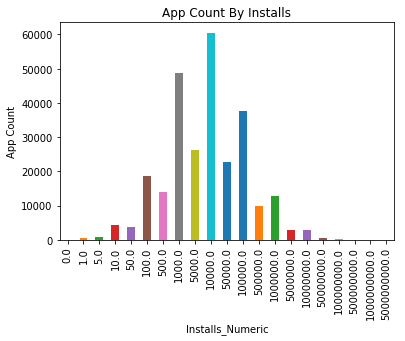

In [18]:
datachart1 = data_valid_installs.groupby("Installs_Numeric").count()["App"].plot(kind="bar", title="App Count By Installs")
datachart1.set_ylabel("App Count")

plt.savefig('Installs_App_Count.png')

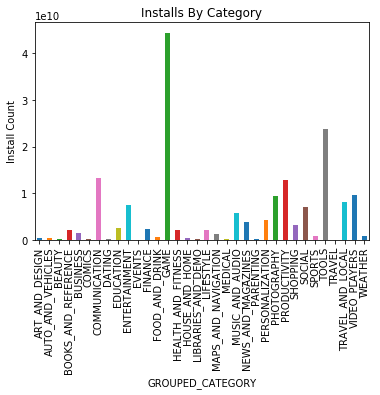

In [19]:
datachart2 = data_valid_installs.groupby("GROUPED_CATEGORY").sum()["Installs_Numeric"].plot(kind="bar", title="Installs By Category")
datachart2.set_ylabel("Install Count")
plt.savefig('Category_Installs.png')

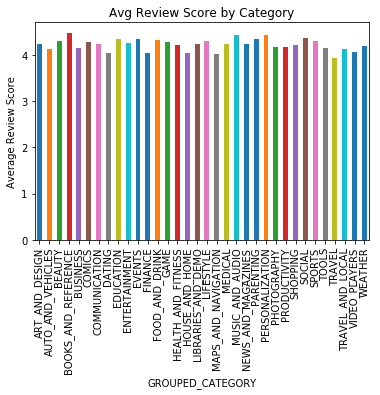

In [21]:
datachart3= data_valid_installs.groupby("GROUPED_CATEGORY").mean()["Rating"].plot(kind="bar", title="Avg Review Score by Category")
datachart3.set_ylabel("Average Review Score")
plt.savefig('Category_Rating.png')

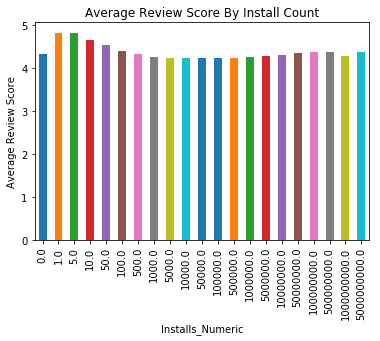

In [22]:
datachart4 = data_valid_installs.groupby("Installs_Numeric").mean()["Rating"].plot(kind="bar", title="Average Review Score By Install Count")
datachart4.set_ylabel("Average Review Score")
plt.savefig('Installs_Rating.png')

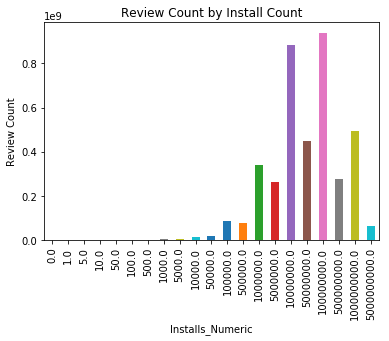

In [23]:
datachart5 = data_valid_installs.groupby("Installs_Numeric").sum()["Reviews"].plot(kind="bar", title="Review Count by Install Count")
datachart5.set_ylabel("Review Count")
plt.savefig('Installs_Reviews.png')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


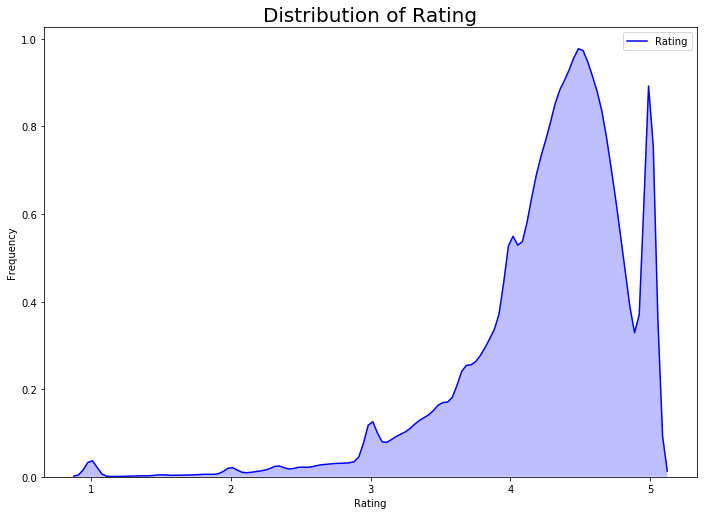

In [24]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data_valid_installs.Rating, color="blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.savefig('Dist_Rating.png')

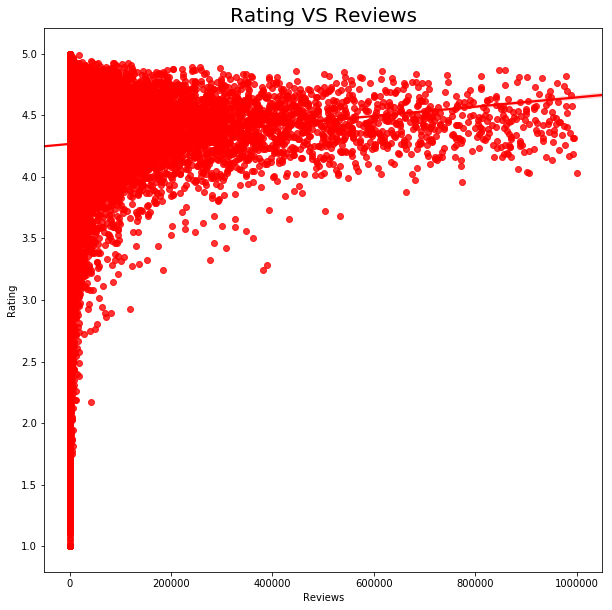

In [26]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'red',data=data_valid_installs[data_valid_installs['Reviews']<1000000]);
plt.title('Rating VS Reviews',size = 20)
plt.savefig('Ratings_vs_Reviews.png')